# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd #fast powerful, flexible , and easy to use open source data analysis and manipulation tool
import matplotlib.pylab as plt #comprhensive library for creating static,animated and visualizations in python
import seaborn as sns #visaualization library based on matplotlib
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Setup Library**

In [2]:
warnings.simplefilter('ignore')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sns.set_style('white')
sns.set_context('paper', font_scale=1.5)

plt.style.use('fivethirtyeight')

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

# **Load Dataset**

I'll use the White wine dataset, since this dataset is bigger than the Red one, idk, I've never drank wine or know what ingredients are in wine, if you have, can you tell me, which Wine have a better taste?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
white_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advpro/winequality-red.csv')

# **Data Preprocessing**

Let's check the data, if we're lucky, we won't get a missing value in the data.

In [5]:
white_wine # let's go to check overall data

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


Great, I forgot to separate the data with `semicolon`, okay, let me fixed it XD

In [6]:
wine_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advpro/winequality-red.csv', sep=';') # hopefully works

In [7]:
wine_data # okay, let's check again

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Great, it's work! okay, let's move on.

In [8]:
wine_data.describe(include='all') # let's check the statistics measure

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
wine_data.isna().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Amazing! It's rarely can find data that does not have a missing value, great job [Brenda Panda](https://www.kaggle.com/brendan45774)!

In [10]:
wine_data.dtypes.to_frame() # let's check the type of the data

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [11]:
wine_data.quality.value_counts() # checking labels

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Okay, this is awesome! the data doesn't have missing value, and all looks great! let's move on.

# **EDA**

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

**Quality columns data is not properly distributed and so we will convert it into 0, and 1**

* **0 Bad White Wine** = 3, 4, 5
* **1 Good White Wine** = 6, 7, 8, 9

In [12]:
wine_data.quality = wine_data.quality.replace([3, 4, 5], 0)
wine_data.quality = wine_data.quality.replace([6, 7, 8, 9], 1)

In [13]:
wine_data.quality.value_counts() # Let's check it

quality
1    855
0    744
Name: count, dtype: int64

okay great!

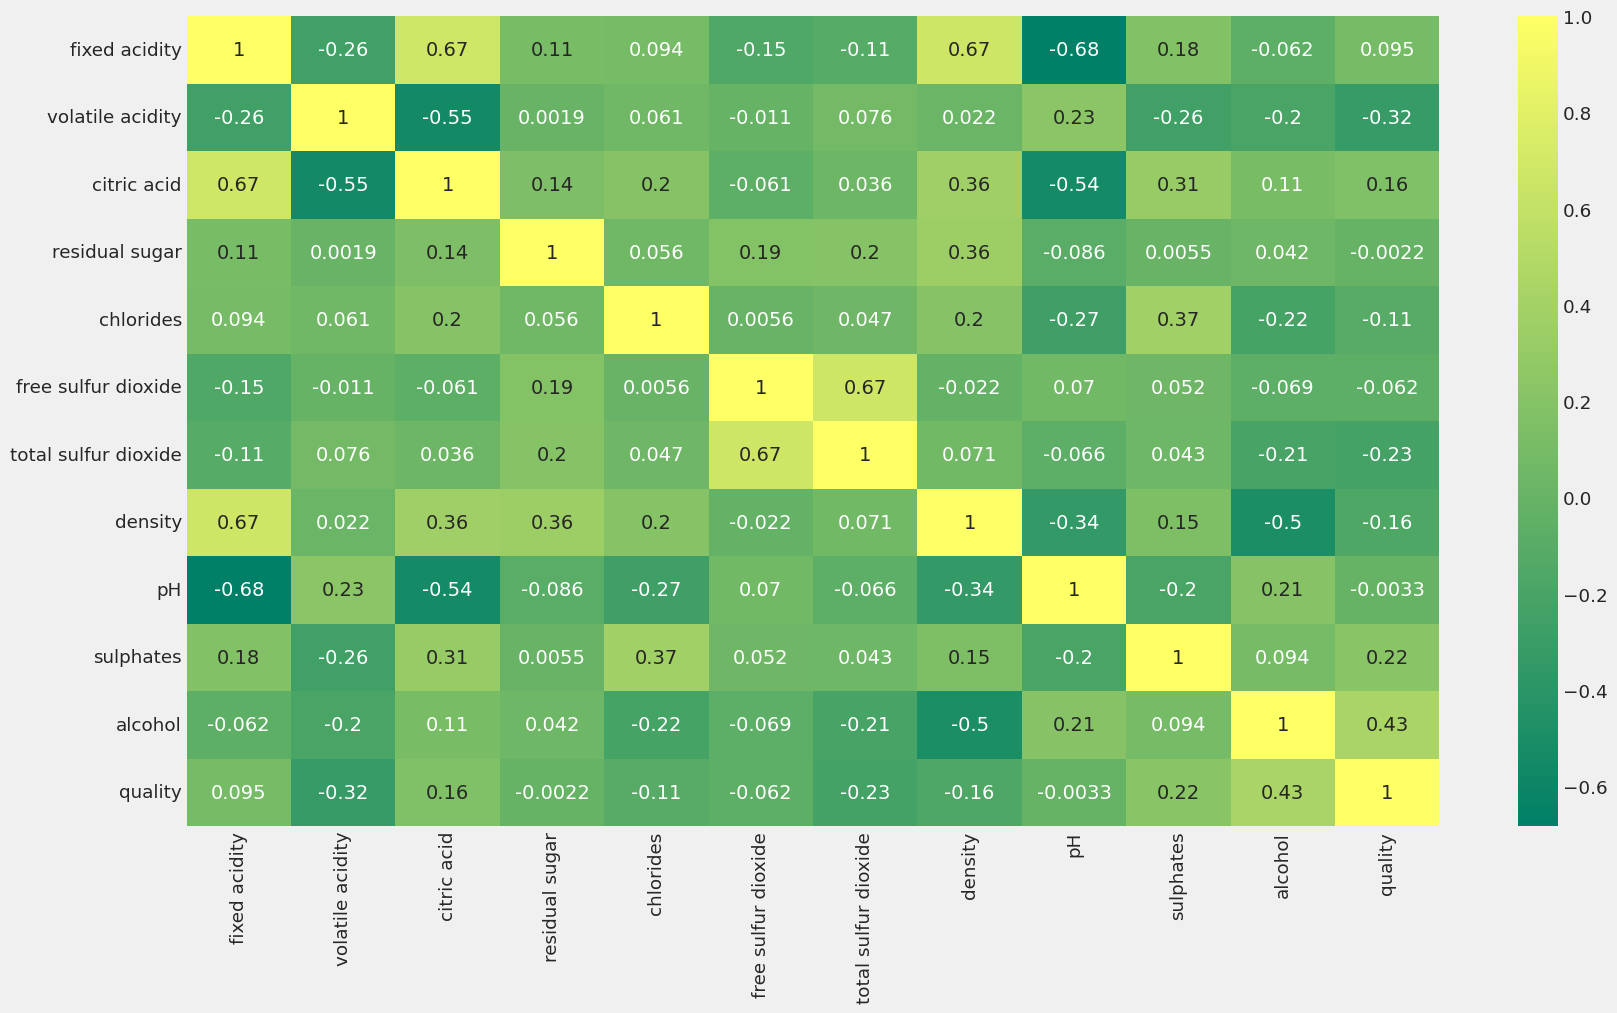

In [14]:
"""let's make a correlation and construct the heatmap visualization to better understand it."""

wine_data_correlation = wine_data.corr() # correlation

plt.figure(figsize=(18, 10)) # figuring the size

sns.heatmap(
    wine_data_correlation, # data
    annot=True, # annotation
    cmap='summer' # I'll use summer cmap, coz, i like summer
);

In [15]:
wine_data_correlation['quality'].sort_values(ascending=False) # let's sort it

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64

`alcohol`, `pH`, `sulpates`, have a better correlation with `quality`

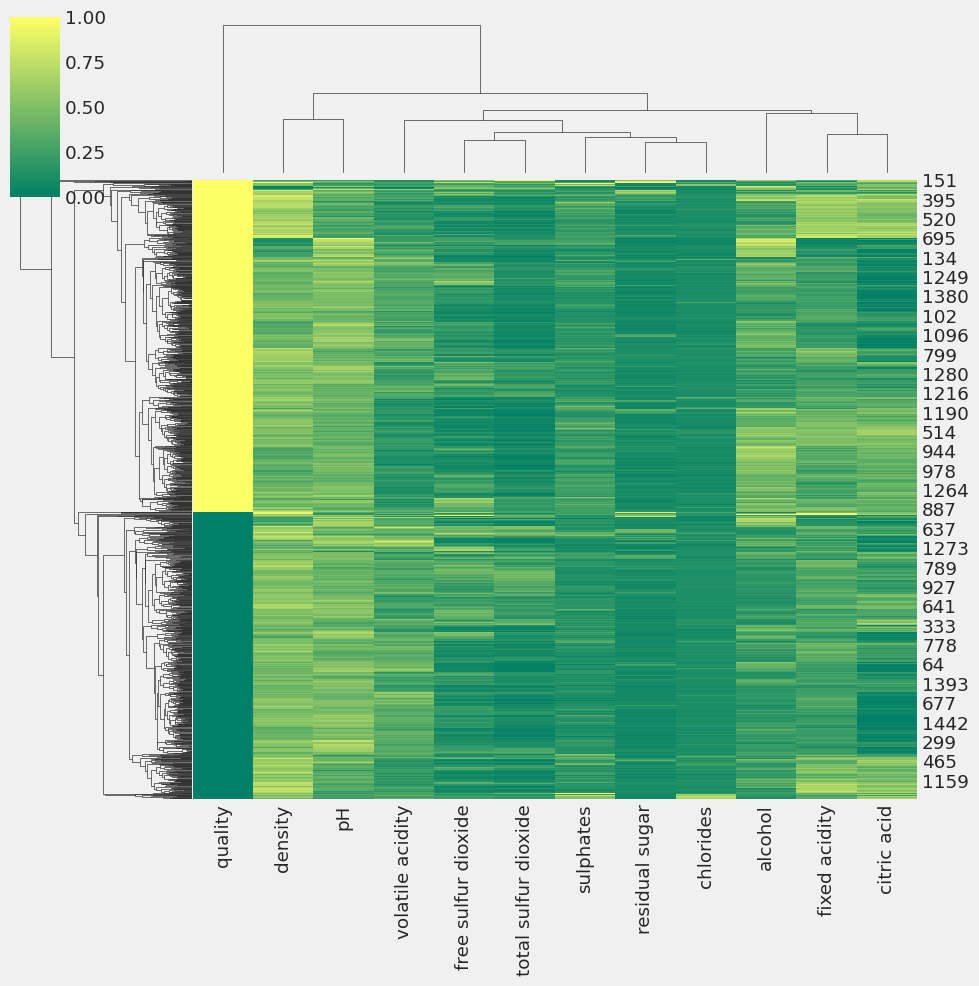

In [16]:
"""Okay, let's try to make a cluster map"""

sns.clustermap(
    wine_data, # data
    cmap='summer', # again, summer, coz i like it
    standard_scale=1 # scale
)

plt.show();

Okay, if we see visualization above, `sulphates - pH is better`.

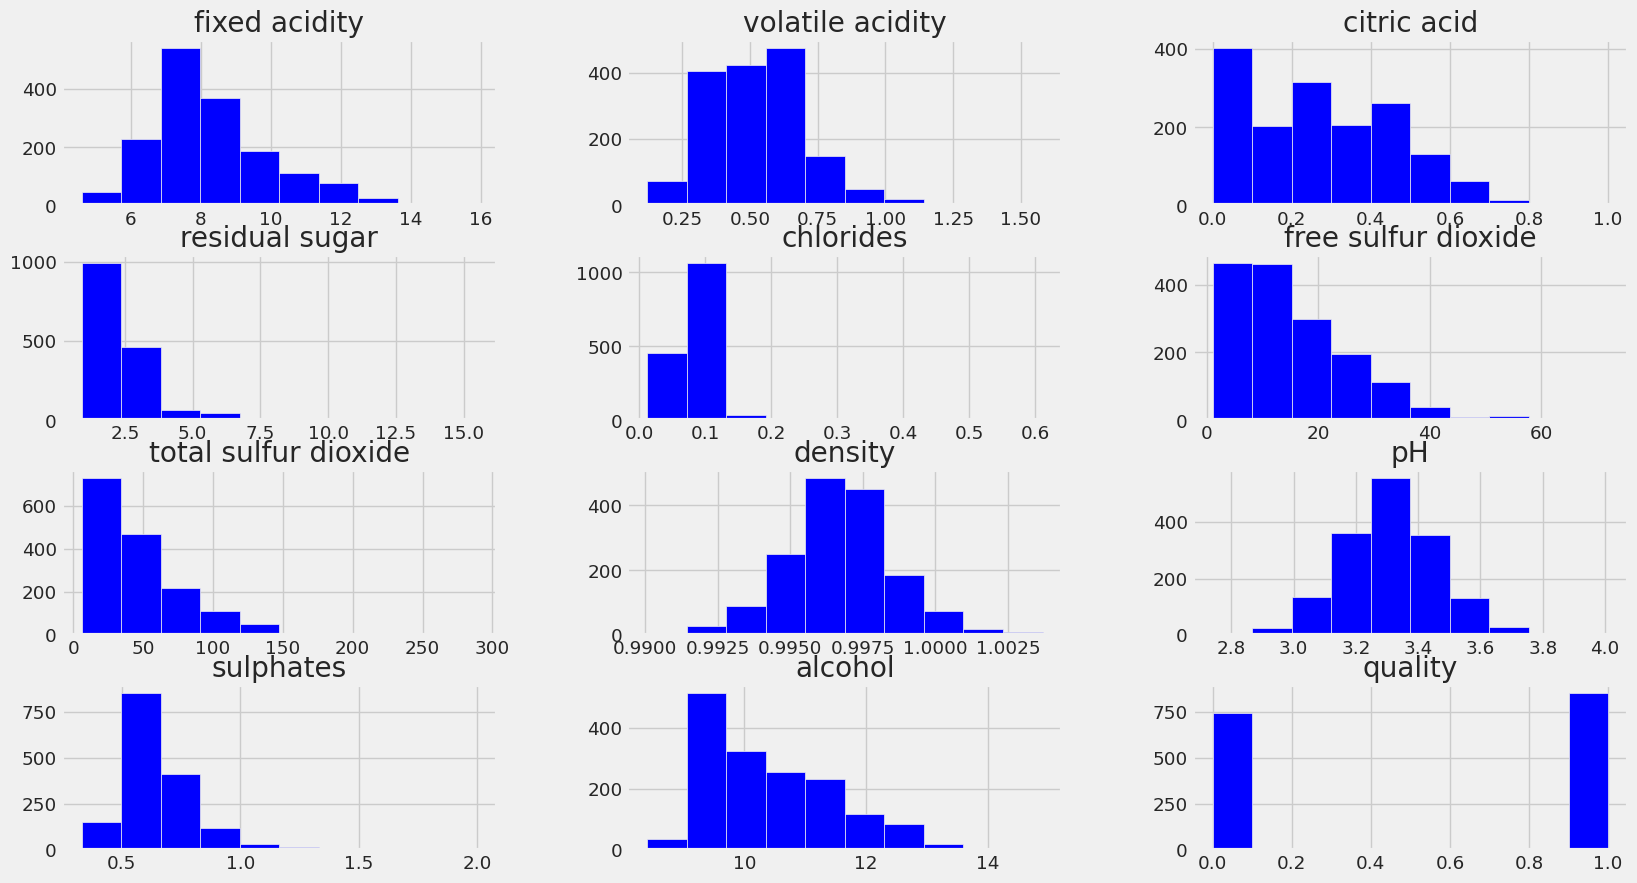

In [17]:
"""Let's make a histogram""" #graph showing frequency distributions - number of instruction within each given interval

wine_data.hist(
    figsize=(18, 10), # figuring the size
    color='blue' # color
);

Okay, i think enough for the EDA, let's move on to Dividing and Splitting our data, but if you want to see more, you can check this Notebook by [Brenda Panda](https://www.kaggle.com/brendan45774/wine-quality-regression-prediction#Correlations).

# **Divide & Split Data**

Let's divide and split the data before we train and modeling it.

In [18]:
from sklearn.model_selection import train_test_split

X = wine_data.drop(columns=['quality']) # features
y = wine_data['quality'] # labels

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# let's check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

# **Train & Modeling**

I'm using `RandomForestClassifier` for this. and `Pipelines` are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [19]:
from sklearn.ensemble import RandomForestClassifier #multiple desicion tree to classify its data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', RandomForestClassifier(
        n_estimators=1000,
        random_state=42,
        criterion='entropy'
    ))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=1000,
                                        random_state=42))])

# **Model Evaluation**

Okay, let's evaluate our model

In [20]:
from sklearn import metrics

pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

In [21]:
train_accuracy = metrics.accuracy_score(y_train, pred_train)
print(f"Accuracy Score: {train_accuracy}")

train_precision = metrics.precision_score(y_train, pred_train)
print(f"Precision Score: {train_precision}")

train_recall = metrics.recall_score(y_train, pred_train)
print(f"Recall Score: {train_recall}")

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


In [22]:
test_accuracy = metrics.accuracy_score(y_test, pred_test)
print(f"Accuracy Score: {test_accuracy}")

test_precision = metrics.precision_score(y_test, pred_test)
print(f"Precision Score: {test_precision}")

test_recall = metrics.recall_score(y_test, pred_test)
print(f"Recall Score: {test_recall}")

Accuracy Score: 0.79375
Precision Score: 0.8156424581005587
Recall Score: 0.8156424581005587


Looks like our model is good.

## **Let's see the output of our prediction**

In [23]:
train_output = pd.DataFrame({
    'Train Actual Price': y_train,
    'Train Predicted Price ': pred_train})

train_output.to_csv('Train Prediction.csv', index=False)

In [24]:
train_prediction_output = pd.read_csv('./Train Prediction.csv')
train_prediction_output.head(10)

,Train Actual Price,Train Predicted Price
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [25]:
test_output = pd.DataFrame({
    'Test Actual Price': y_test,
    'Test Predicted Price ': pred_test})

test_output.to_csv('Test Prediction.csv', index=False)

In [26]:
test_prediction_output = pd.read_csv('./Test Prediction.csv')
test_prediction_output.head(10)

,Test Actual Price,Test Predicted Price
0,1,0
1,0,0
2,1,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1


Wow, you see that? that's so amazing, looks like our model working fine!